In [1]:
import json

In [12]:
file_path = "/home/ubuntu/plasma-converter/data/prover-llm_v0/lean_workbook_with_proofs.json"
with open(file_path, 'r') as f:
    data = json.load(f)

In [15]:
data[:2]

[{'natural_language_statement': '$29\\cdot31+37-41\\equiv 3\\pmod{4}$',
  'answer': '3',
  'tags': ['number_theory', 'equation', 'modular_arithmetic'],
  'formal_statement': 'theorem lean_workbook_18 : (29 * 31 + 37 - 41) % 4 = 3  :=  by \n',
  'split': 'lean_workbook',
  'proof': ['simp [Nat.mod_lt]',
   'simp only [Nat.add_mod_left, Nat.mod_eq_zero_of_dvd, dvd_pow]',
   'simp only [Nat.gcd_add_self_right]',
   'simp only [Nat.add_mod, Nat.mul_mod, Nat.mod_mod]',
   'simp only [Nat.mod_add_div]',
   'exact (by norm_num : (29 * 31 + 37 - 41) % 4 = 3)',
   'simp only [Nat.mul_comm, Nat.mul_assoc, Nat.mul_left_comm]',
   'norm_num [Int.add_emod]',
   'simp only [Nat.mul_mod_right]',
   'simp only [add_comm]',
   'simp only [Nat.gcd]',
   'simp only [Nat.mod_eq_zero_of_dvd, dvd_pow]',
   'simp only [Nat.mul_mod, Nat.mod_mod]',
   'simp [Mod.mod]',
   'simp only [Nat.add_comm, Nat.add_left_comm, Nat.add_assoc, Nat.mul_comm, Nat.mul_left_comm, Nat.mul_assoc, Nat.sub_sub]',
   'simp only [Na

In [16]:
max_proof_length = max([max(pf.count('\n') for pf in problem['proof']) for problem in data])

In [24]:
proof_lens = [min(pf.count('\n') for pf in problem['proof']) for problem in data]

(array([8.868e+03, 2.548e+03, 7.510e+02, 0.000e+00, 3.670e+02, 1.610e+02,
        5.600e+01, 0.000e+00, 2.400e+01, 1.400e+01, 1.000e+01, 0.000e+00,
        1.200e+01, 2.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00]),
 array([ 0.  ,  0.75,  1.5 ,  2.25,  3.  ,  3.75,  4.5 ,  5.25,  6.  ,
         6.75,  7.5 ,  8.25,  9.  ,  9.75, 10.5 , 11.25, 12.  , 12.75,
        13.5 , 14.25, 15.  ]),
 <BarContainer object of 20 artists>)

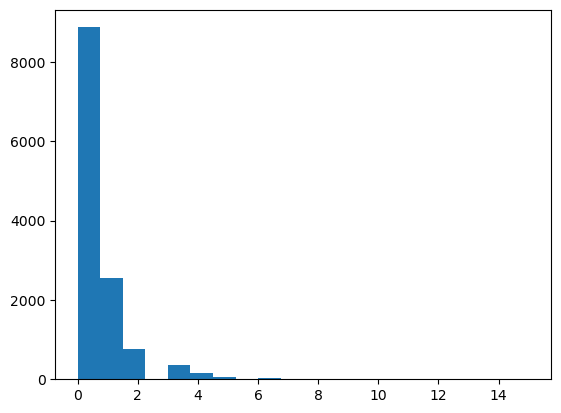

In [28]:
# histogram of proof_lens
import matplotlib.pyplot as plt
import numpy as np

plt.hist(proof_lens, bins=20)

In [26]:
max(proof_lens)

15

In [36]:
from pprint import pprint

In [37]:
for i, problem in enumerate(data):
    if min(pf.count('\n') for pf in problem['proof']) == 15:
        print("i", i)
        print(data[i]['formal_statement'])
        print(len(data[i]['proof']))
        pprint(data[i]['proof'])
        break

i 6024
theorem lean_workbook_plus_11526 (a b c : ℝ) : (a^2 + b^2 + a * b) * (b^2 + c^2 + b * c) * (c^2 + a^2 + c * a) ≥ 3 * (a * b^2 + b * c^2 + c * a^2) * (a^2 * b + b^2 * c + c^2 * a)   :=  by 

1
['have := sq_nonneg ((b - a) * (c - b) * (a - c))\n'
 'have := sq_nonneg ((a + b + c) * (a^2 + b^2 + c^2 - a * b - b * c - c * a))\n'
 'have := sq_nonneg ((a^2 + b^2 + c^2) * (a^3 + b^3 + c^3 - a^2 * b - b^2 * c '
 '- c^2 * a) - (a + b + c) * (a^2 * b^2 + b^2 * c^2 + c^2 * a^2 - a^2 * b * '
 'c))\n'
 'have := sq_nonneg ((a^5 + b^5 + c^5 - a^2 * b^3 - b^2 * c^3 - c^2 * a^3) * '
 '(a + b + c) - (a^3 + b^3 + c^3 - a^2 * b - b^2 * c - c^2 * a) * (a^2 + b^2 + '
 'c^2))\n'
 'have := sq_nonneg ((a^3 + b^3 + c^3) * (a^2 * b + b^2 * c + c^2 * a) - (a^2 '
 '+ b^2 + c^2) * (a * b^2 + b * c^2 + c * a^2))\n'
 'have := sq_nonneg ((a^2 * b + b^2 * c + c^2 * a) * (a * b^2 + b * c^2 + c * '
 'a^2) - (a * b * c) * (a^3 + b^3 + c^3))\n'
 'have := sq_nonneg ((a * b * c) * (a^3 + b^3 + c^3) - (a^2 + b^2 + c^2) 